## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  59.752486   437.289790  0.184423  4.901386  0.950707
1  12.978576   618.632501  0.333498  4.516517  1.448568
2  41.305025  1706.587265  0.869951  6.437507  1.543837
3  18.758530  1527.707962  0.607363  2.503991  1.633929
4  60.373310   864.536527  0.272910  3.051727  1.183465


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0204364	total: 68.5ms	remaining: 1m 8s
1:	learn: 1.0112254	total: 69.2ms	remaining: 34.5s
2:	learn: 1.0024621	total: 69.6ms	remaining: 23.1s
3:	learn: 0.9936672	total: 70.1ms	remaining: 17.5s
4:	learn: 0.9847731	total: 70.8ms	remaining: 14.1s
5:	learn: 0.9742354	total: 71.3ms	remaining: 11.8s
6:	learn: 0.9657089	total: 71.7ms	remaining: 10.2s
7:	learn: 0.9555489	total: 72.2ms	remaining: 8.95s
8:	learn: 0.9468973	total: 72.8ms	remaining: 8.02s
9:	learn: 0.9362255	total: 73.2ms	remaining: 7.25s
10:	learn: 0.9276583	total: 73.7ms	remaining: 6.62s
11:	learn: 0.9185423	total: 74.3ms	remaining: 6.11s
12:	learn: 0.9101593	total: 74.7ms	remaining: 5.67s
13:	learn: 0.9018562	total: 75.2ms	remaining: 5.29s
14:	learn: 0.8932563	total: 75.6ms	remaining: 4.97s
15:	learn: 0.8861027	total: 76.1ms	remaining: 4.68s
16:	learn: 0.8780733	total: 76.6ms	remaining: 4.43s
17:	learn: 0.8702656	total: 77.1ms	remaining: 4.2s
18:	learn: 0.8626287	total: 77.5ms	remaining:

87:	learn: 0.4752759	total: 109ms	remaining: 1.13s
88:	learn: 0.4714291	total: 109ms	remaining: 1.12s
89:	learn: 0.4678010	total: 110ms	remaining: 1.11s
90:	learn: 0.4638019	total: 110ms	remaining: 1.1s
91:	learn: 0.4606759	total: 110ms	remaining: 1.09s
92:	learn: 0.4575241	total: 111ms	remaining: 1.08s
93:	learn: 0.4545219	total: 111ms	remaining: 1.07s
94:	learn: 0.4510786	total: 111ms	remaining: 1.06s
95:	learn: 0.4476789	total: 112ms	remaining: 1.05s
96:	learn: 0.4443184	total: 112ms	remaining: 1.04s
97:	learn: 0.4412161	total: 113ms	remaining: 1.03s
98:	learn: 0.4378573	total: 113ms	remaining: 1.03s
99:	learn: 0.4343974	total: 113ms	remaining: 1.02s
100:	learn: 0.4311709	total: 114ms	remaining: 1.01s
101:	learn: 0.4279605	total: 114ms	remaining: 1s
102:	learn: 0.4252030	total: 114ms	remaining: 997ms
103:	learn: 0.4222592	total: 115ms	remaining: 990ms
104:	learn: 0.4184858	total: 115ms	remaining: 983ms
105:	learn: 0.4157070	total: 116ms	remaining: 978ms
106:	learn: 0.4124314	total: 

264:	learn: 0.1689363	total: 187ms	remaining: 518ms
265:	learn: 0.1681238	total: 187ms	remaining: 517ms
266:	learn: 0.1673083	total: 188ms	remaining: 515ms
267:	learn: 0.1665441	total: 188ms	remaining: 514ms
268:	learn: 0.1659620	total: 189ms	remaining: 513ms
269:	learn: 0.1652909	total: 189ms	remaining: 512ms
270:	learn: 0.1647859	total: 190ms	remaining: 510ms
271:	learn: 0.1640838	total: 190ms	remaining: 508ms
272:	learn: 0.1635976	total: 190ms	remaining: 507ms
273:	learn: 0.1628911	total: 191ms	remaining: 506ms
274:	learn: 0.1620826	total: 191ms	remaining: 504ms
275:	learn: 0.1614647	total: 192ms	remaining: 503ms
276:	learn: 0.1608257	total: 192ms	remaining: 501ms
277:	learn: 0.1600444	total: 193ms	remaining: 500ms
278:	learn: 0.1593863	total: 193ms	remaining: 498ms
279:	learn: 0.1586345	total: 193ms	remaining: 497ms
280:	learn: 0.1578390	total: 194ms	remaining: 495ms
281:	learn: 0.1573226	total: 194ms	remaining: 494ms
282:	learn: 0.1565743	total: 194ms	remaining: 492ms
283:	learn: 

510:	learn: 0.0701678	total: 290ms	remaining: 278ms
511:	learn: 0.0700866	total: 291ms	remaining: 277ms
512:	learn: 0.0700066	total: 291ms	remaining: 276ms
513:	learn: 0.0696377	total: 291ms	remaining: 275ms
514:	learn: 0.0695469	total: 292ms	remaining: 275ms
515:	learn: 0.0694576	total: 292ms	remaining: 274ms
516:	learn: 0.0693698	total: 293ms	remaining: 273ms
517:	learn: 0.0692834	total: 293ms	remaining: 273ms
518:	learn: 0.0691985	total: 293ms	remaining: 272ms
519:	learn: 0.0689803	total: 294ms	remaining: 271ms
520:	learn: 0.0688971	total: 294ms	remaining: 271ms
521:	learn: 0.0688310	total: 295ms	remaining: 270ms
522:	learn: 0.0684708	total: 295ms	remaining: 269ms
523:	learn: 0.0684053	total: 296ms	remaining: 269ms
524:	learn: 0.0683407	total: 296ms	remaining: 268ms
525:	learn: 0.0679867	total: 297ms	remaining: 267ms
526:	learn: 0.0679227	total: 297ms	remaining: 267ms
527:	learn: 0.0678443	total: 298ms	remaining: 266ms
528:	learn: 0.0674966	total: 298ms	remaining: 265ms
529:	learn: 

691:	learn: 0.0471591	total: 368ms	remaining: 164ms
692:	learn: 0.0471235	total: 369ms	remaining: 163ms
693:	learn: 0.0470161	total: 369ms	remaining: 163ms
694:	learn: 0.0469835	total: 370ms	remaining: 162ms
695:	learn: 0.0469043	total: 370ms	remaining: 162ms
696:	learn: 0.0468695	total: 371ms	remaining: 161ms
697:	learn: 0.0467660	total: 371ms	remaining: 161ms
698:	learn: 0.0466637	total: 372ms	remaining: 160ms
699:	learn: 0.0466314	total: 372ms	remaining: 159ms
700:	learn: 0.0465997	total: 372ms	remaining: 159ms
701:	learn: 0.0464646	total: 373ms	remaining: 158ms
702:	learn: 0.0464347	total: 373ms	remaining: 158ms
703:	learn: 0.0463596	total: 373ms	remaining: 157ms
704:	learn: 0.0463261	total: 374ms	remaining: 157ms
705:	learn: 0.0462270	total: 374ms	remaining: 156ms
706:	learn: 0.0461960	total: 375ms	remaining: 155ms
707:	learn: 0.0461671	total: 375ms	remaining: 155ms
708:	learn: 0.0460352	total: 375ms	remaining: 154ms
709:	learn: 0.0460049	total: 376ms	remaining: 154ms
710:	learn: 

928:	learn: 0.0279655	total: 472ms	remaining: 36.1ms
929:	learn: 0.0279436	total: 473ms	remaining: 35.6ms
930:	learn: 0.0278273	total: 473ms	remaining: 35.1ms
931:	learn: 0.0276976	total: 474ms	remaining: 34.6ms
932:	learn: 0.0275837	total: 474ms	remaining: 34ms
933:	learn: 0.0274562	total: 474ms	remaining: 33.5ms
934:	learn: 0.0273447	total: 475ms	remaining: 33ms
935:	learn: 0.0272193	total: 475ms	remaining: 32.5ms
936:	learn: 0.0270965	total: 476ms	remaining: 32ms
937:	learn: 0.0269989	total: 476ms	remaining: 31.5ms
938:	learn: 0.0268902	total: 477ms	remaining: 31ms
939:	learn: 0.0267694	total: 477ms	remaining: 30.4ms
940:	learn: 0.0266748	total: 478ms	remaining: 29.9ms
941:	learn: 0.0265693	total: 478ms	remaining: 29.4ms
942:	learn: 0.0264506	total: 479ms	remaining: 28.9ms
943:	learn: 0.0263576	total: 479ms	remaining: 28.4ms
944:	learn: 0.0262411	total: 480ms	remaining: 27.9ms
945:	learn: 0.0261307	total: 480ms	remaining: 27.4ms
946:	learn: 0.0261194	total: 480ms	remaining: 26.9ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

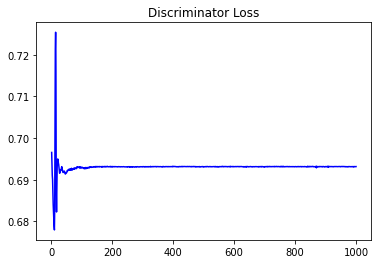

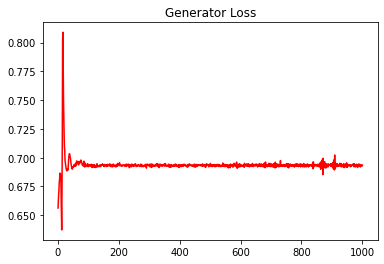

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14972705138872758


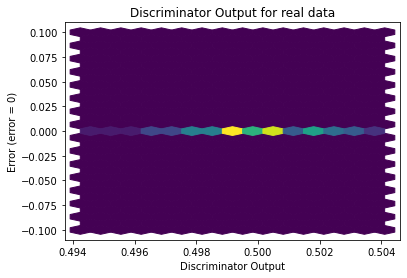

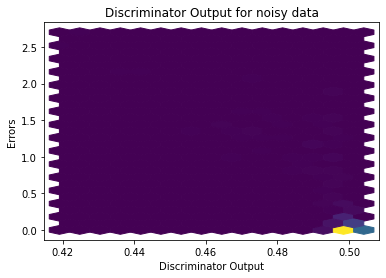

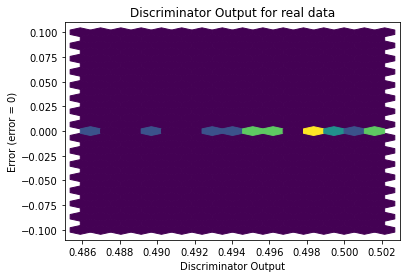

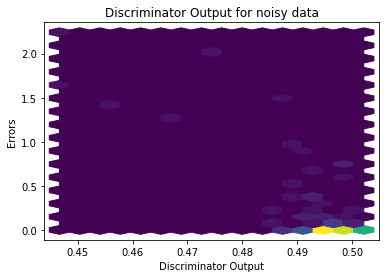

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


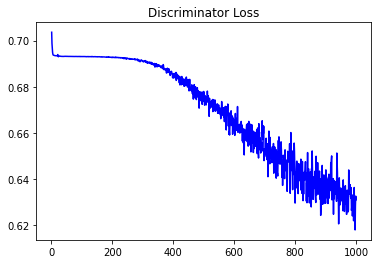

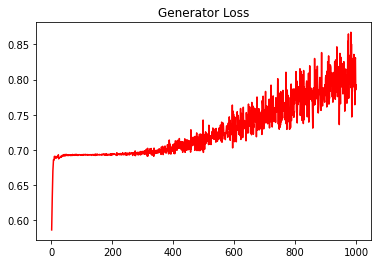

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14301895665974682


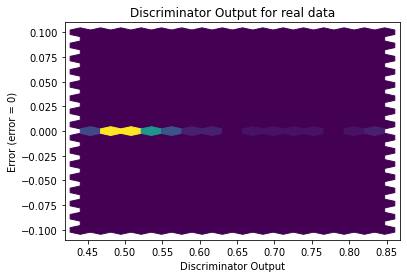

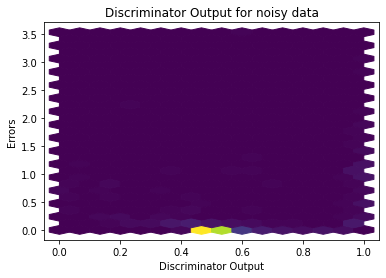

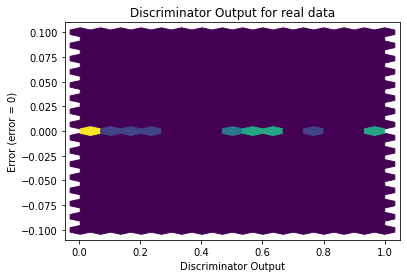

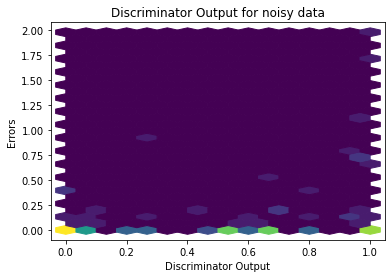

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
